German Traffic Sign Recognition Benchmark (GTSRB)
=================================================
---
Introduction au Deep Learning  (IDLE) - S. Aria, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020

## Episode 2 : First Convolutions

 - Read dataset
 - Build a model
 - Train the model
 - Model evaluation

## 1/ Import and init

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import idle.pwk as ooo

ooo.init()

IDLE 2020 - Practical Work Module
  Version            : 0.1.1
  Run time           : Saturday 4 January 2020, 17:27:01
  Matplotlib style   : idle/talk.mplstyle
  TensorFlow version : 2.0.0
  Keras version      : 2.2.4-tf


## 2/ Reload dataset
Dataset is one of the saved dataset: RGB25, RGB35, L25, L35, etc.

In [19]:
%%time

dataset ='L25'
img_lx  = 25
img_ly  = 25
img_lz  = 1

# ---- Read dataset
x_train = np.load('./data/{}/x_train.npy'.format(dataset))
y_train = np.load('./data/{}/y_train.npy'.format(dataset))

x_test  = np.load('./data/{}/x_test.npy'.format(dataset))
y_test  = np.load('./data/{}/y_test.npy'.format(dataset))

# ---- Reshape data
x_train = x_train.reshape( x_train.shape[0], img_lx, img_ly, img_lz)
x_test  = x_test.reshape(  x_test.shape[0],  img_lx, img_ly, img_lz)

input_shape = (img_lx, img_ly, img_lz)


CPU times: user 0 ns, sys: 391 ms, total: 391 ms
Wall time: 402 ms


## 3/ Have a look to the dataset
Note: Data must be reshape for matplotlib

x_train :  (39209, 25, 25, 1)
y_train :  (39209,)
x_test  :  (12630, 25, 25, 1)
y_test  :  (12630,)


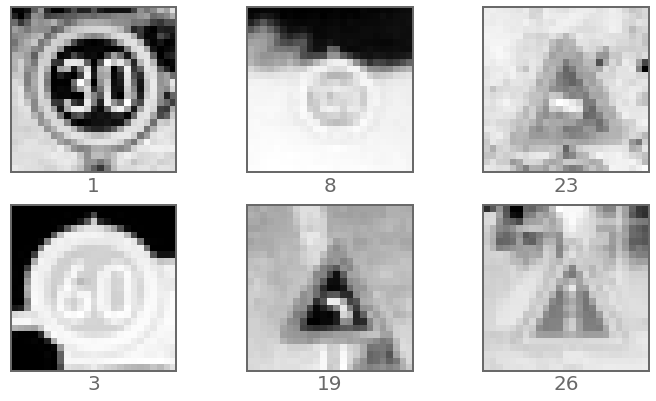

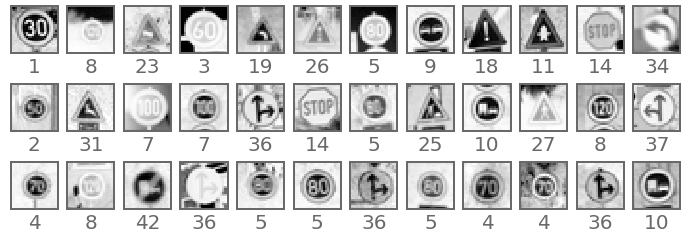

In [20]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test  : ", x_test.shape)
print("y_test  : ", y_test.shape)

if img_lz>1:
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly,img_lz), y_train, range(6),  columns=3,  x_size=4, y_size=3)
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly,img_lz), y_train, range(36), columns=12, x_size=1, y_size=1)
else:
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly), y_train, range(6),  columns=3,  x_size=4, y_size=3)
    ooo.plot_images(x_train.reshape(-1,img_lx,img_ly), y_train, range(36), columns=12, x_size=1, y_size=1)

## 4/ Create model

In [21]:
batch_size  =  64
num_classes =  43
epochs      =  5

In [26]:
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(96, (3,3), activation='relu', input_shape=(img_lx, img_ly, img_lz)))
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(192, (3, 3), activation='relu'))
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(3072, activation='relu'))
model.add( keras.layers.Dense(500, activation='relu'))
model.add( keras.layers.Dense(500, activation='relu'))
model.add( keras.layers.Dense(43, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 23, 23, 96)        960       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 192)         166080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 192)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_13 (Dense)             (None, 500)              

## 5/ Run model

In [27]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 39209 samples, validate on 12630 samples
Epoch 1/5
39209/39209 [==============================] - 56s 1ms/sample - loss: 0.8898 - accuracy: 0.7450 - val_loss: 0.4579 - val_accuracy: 0.8946
Epoch 2/5
39209/39209 [==============================] - 60s 2ms/sample - loss: 0.0993 - accuracy: 0.9720 - val_loss: 0.3929 - val_accuracy: 0.9124
Epoch 3/5
39209/39209 [==============================] - 60s 2ms/sample - loss: 0.0622 - accuracy: 0.9821 - val_loss: 0.3377 - val_accuracy: 0.9279
Epoch 4/5
39209/39209 [==============================] - 62s 2ms/sample - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.2480 - val_accuracy: 0.9462
Epoch 5/5
39209/39209 [==============================] - 65s 2ms/sample - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.2265 - val_accuracy: 0.9461
CPU times: user 28min 6s, sys: 7min 30s, total: 35min 37s
Wall time: 5min 3s


## 6/ Evaluation

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))

Test loss      : 0.2265
Test accuracy  : 0.9461


**Results :**  
25LHE : 93.4%  
35LHE : 95 %  avec Convo. 192 3x3 ou pas (->10')  
25L : 93.6 %  
25RGB : 92.6 %
25RGB : 95.15  avec prof. 192